In [3]:
import os
import numpy as np
import pandas as pd
import librosa, librosa.display
import sklearn
import random as rn
import torch
import torch.nn as nn

In [4]:
pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i-a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

In [39]:
train_dataset = []
test_dataset = []
train_transcript = []
test_transcript = []

train_path = './data/1'
test_path = './data/2'

transcript = pd.read_table('./data/transcripts.txt',sep='|')
transcript_list = transcript['문장']
transcript.drop(['문장2', '문장3','?','영문'], axis=1)
path_list = pd.DataFrame(transcript.파일명.str.split('/',3).tolist(),
                          columns= ['폴더','파일명'])
path_list = path_list['파일명']
transcript = pd.DataFrame({
    'filename':path_list,
    'script':transcript_list
})
transcript

,filename,script
0,1_0000.wav,그는 괜찮은 척하려고 애쓰는 것 같았다.
1,1_0001.wav,그녀의 사랑을 얻기 위해 애썼지만 헛수고였다.
2,1_0002.wav,용돈을 아껴 써라.
3,1_0003.wav,그는 아내를 많이 아낀다.
4,1_0004.wav,그 애 전화번호 알아?
...,...,...
12849,4_5627.wav,깨진 유리 조각에 손가락을 벴어요.
12850,4_5628.wav,아드님이 친구들과 야구를 하다 유리창을 깼어요.
12851,4_5629.wav,일찍 신청하는 사람이 유리할 거야.
12852,4_5630.wav,이 두 소설은 줄거리가 유사해요.


In [41]:
train_X = []
train_y = []
test_X = []
test_y = []

In [46]:
import warnings

warnings.filterwarnings('ignore')

# train data
for filename in os.listdir(train_path):
    data = f'{train_path}/{filename}'
    wav, sr = librosa.load(data,sr=16000)
    mfcc = librosa.feature.mfcc(wav)
    padded_mfcc = pad2d(mfcc, 40)
    train_dataset.append(padded_mfcc)
    
    tuple = transcript[transcript['filename'].str.contains(filename)]
    script = tuple['script'].values[0]
    train_transcript.append(script)    

# test data
for filename in os.listdir(test_path):
    data = f'{test_path}/{filename}'
    wav, sr = librosa.load(data,sr=16000)
    mfcc = librosa.feature.mfcc(wav)
    padded_mfcc = pad2d(mfcc, 40)
    test_dataset.append(padded_mfcc)
    
    tuple = transcript[transcript['filename'].str.contains(filename)]
    script = tuple['script'].values[0]
    test_transcript.append(script)

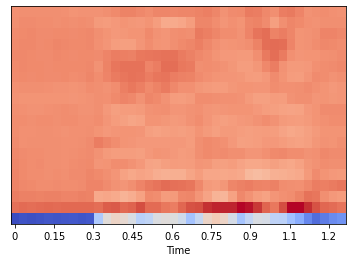

In [40]:
librosa.display.specshow(train_dataset[0], sr=16000, x_axis='time')